<b>Importing Libraries that we require while performing operations.</b>

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("dataframe_.csv")

In [14]:
data.head(25)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


In [17]:
data.tail(25)

,input,output
1672,2.565891,-111.595900
1673,15.737782,-110.995411
1674,11.633331,-95.000000
1675,-6.995212,-81.878729
1676,-7.573154,-102.188449
1677,5.749237,-80.026767
1678,17.633331,-93.000000
1679,9.626859,-110.907090
1680,33.288135,-79.683868
1681,6.691872,-85.892144


In [6]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [9]:
data.shape

(1697, 2)

In [11]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [15]:
print(data.isnull().sum())

input     1
output    1
dtype: int64


In [16]:
data.isnull()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1692,False,False
1693,False,False
1694,False,False
1695,False,False


In [31]:
data.notnull().sum(axis=0)

input     1697
output    1697
dtype: int64

In [21]:
data = data.fillna(data.mean())
data.isnull().sum()

input     0
output    0
dtype: int64

In [35]:
data1 = data.fillna(data.median())
data1.isnull().sum()

input     0
output    0
dtype: int64

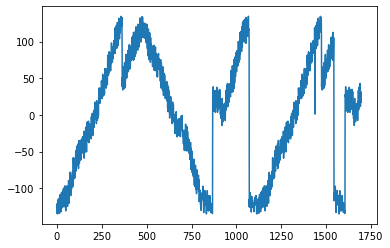

In [22]:
plt.plot(data['input'])

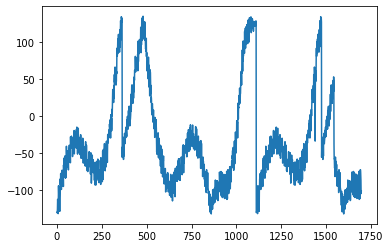

In [26]:
plt.plot(data['output'])

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

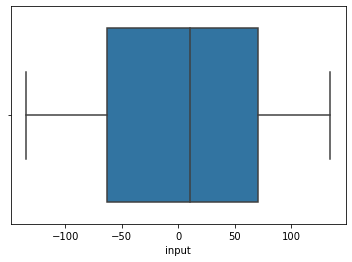

In [27]:
sns.boxplot(data['input'])

<b>As is evident, input contains no outliers.</b>

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

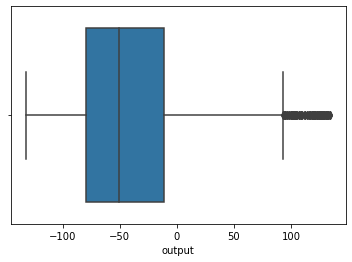

In [28]:
sns.boxplot(data['output'])

<b>As is evident, output contains outliers.</b>

In [40]:
data['output'].quantile(0.999)

133.7931158

In [41]:
data2 = data[data['output'] <= 135]

In [42]:
data2.describe()

,input,output
count,1697.000000,1697.000000
mean,1.159933,-34.088017
std,78.982675,65.751719
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.008175,-50.376850
75%,70.264109,-11.000000
max,134.605775,134.425495


In [44]:
data.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


<AxesSubplot:xlabel='input', ylabel='output'>

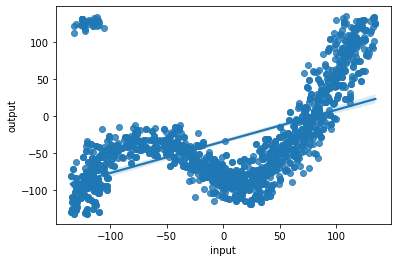

In [48]:
sns.regplot(x='input',y='output',data=data)

<b>As can be seen, input grows with respect to output at a particular level and then declines with respect to output after that level it can seen when both output and input less than zero. When the input exceeds 0, the output increases linearly after that.</b>

<h1> Linear Regression and PolyRegression</h1>

In [57]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression()

In [60]:
a=data[['input']]
b=data['output']


In [61]:
lm.fit(a,b)

LinearRegression()

In [62]:
Yhat=lm.predict(a)
Yhat[0:5]   

array([-86.87518319, -86.35998977, -92.06285051, -85.96569911,
       -89.92315363])

In [63]:
lm.intercept_

-34.58220008713727

In [64]:
lm.coef_

array([0.42604447])

(0.0, 147.76787831000001)

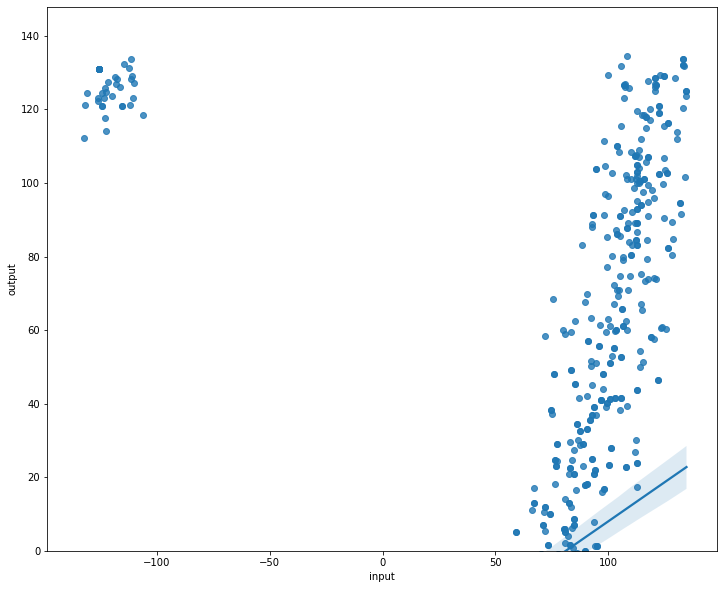

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="input", y="output", data=data)
plt.ylim(0,)

<p><b>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</b></p>

(0.0, 147.76787831000001)

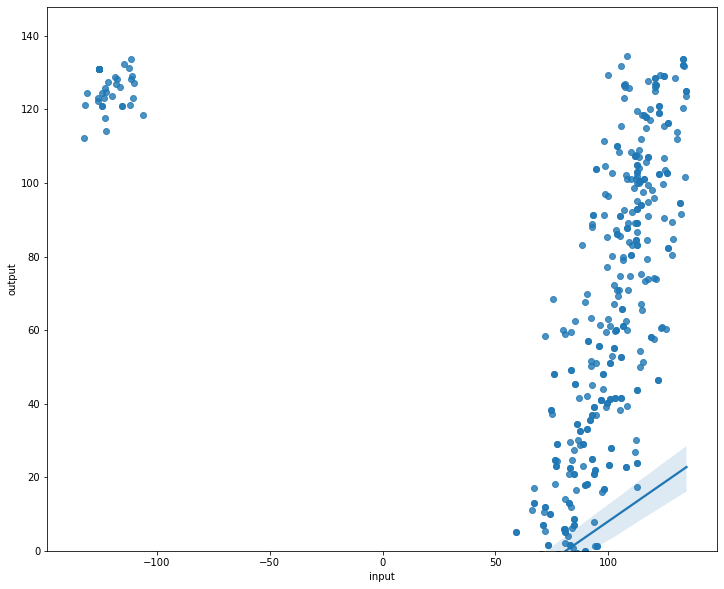

In [68]:
plt.figure(figsize=(width, height))
sns.regplot(x="input", y="output", data=data)
plt.ylim(0,)

In [69]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Input')

    plt.show()
    plt.close()

In [71]:
x = data['input']
y = data['output']

In [72]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
6.004e-05 x + 0.006994 x - 0.1567 x - 72.82


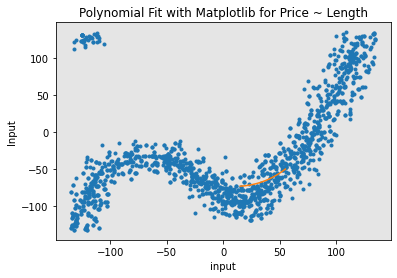

In [73]:
PlotPolly(p, x, y, 'input')

In [74]:
np.polyfit(x, y, 3)

array([ 6.00410571e-05,  6.99436862e-03, -1.56663023e-01, -7.28234061e+01])

<b>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.</b>

In [76]:
from sklearn.metrics import r2_score

In [77]:
r_squared = r2_score(y, p(x))
print('The R-square value polynomial is: ', r_squared)

The R-square value is:  0.6549316129206045


In [80]:
lm.fit(a, b)
# Find the R^2
print('The R-square linear regression is: ', lm.score(a, b))

The R-square is:  0.2619143676055594


In [81]:
from sklearn.metrics import mean_squared_error

In [83]:
mse = mean_squared_error(data['output'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  3189.076841478018


In [84]:
mse = mean_squared_error(data['input'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  3296.2464118824237


In [86]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data['input'],data['output'] , test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 255
number of training samples: 1442


## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dc= DecisionTreeRegressor()
dc

DecisionTreeRegressor()

In [104]:

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(a, b, test_size= 0.25, random_state=0)

In [105]:
dc.fit(x_train, y_train)

DecisionTreeRegressor()

In [111]:
dc.score(x_test,y_test)

0.6037299956099643

<b>The testing is about 61%</b>

In [107]:
Yhat_dc=dc.predict(a)
Yhat_dc[0:5]

array([-130.5720846, -129.9389289, -130.1418321, -125.7609321,
       -122.6300049])

In [110]:
mse_dc = mean_squared_error(data['output'], Yhat_dc)
print('The mean square error of price and predicted value is: ', mse_dc)

The mean square error of price and predicted value is:  533.543357840822


<h1>Neaural Network</h1>

In [112]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [114]:
ml=MLPRegressor()
ml

MLPRegressor()

In [116]:
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[0:5])
regr.score(X_test, y_test)

C:\Users\Atharva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.4162338898076594

<b>The testing is about 42%</b>

<ol>For the given dataset I used algorithm: 
    
     1.Linear Regression 
    
     2.Poly Regression
    
     3.Neural Network
    
     4.Decision Tree</ol>
    
    
    The best algorithm for this data is Decision Tree that is Maximum with 61%. Higher the accuracy best model is good.